#### FiFA World Cup
The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Data Overview

In [2]:
df = pd.read_csv('WorldCupMatches.csv')
df1 = pd.read_csv('WorldCupPlayers.csv')
df3 = pd.read_csv('WorldCups.csv')

In [5]:
display(df.head())
display(df1.head())
display(df3.head())

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [4]:
dupli = df.drop_duplicates()
finaldf = dupli.dropna()

att= finaldf.groupby('Year').Attendance.sum().reset_index()
display(att.head())
att['Year'] = att['Year'].astype(int)
suma = att['Attendance'].sum()

,Year,Attendance
0,1930.0,590549.0
1,1934.0,363000.0
2,1938.0,375700.0
3,1950.0,1045246.0
4,1954.0,768607.0


#### Attendance by Year
Approximately 3.7 million people attended the 64 world cup matches played from 1930-2014 with aspike in attendance in 1994 with an average of 58,000 attendance per game.

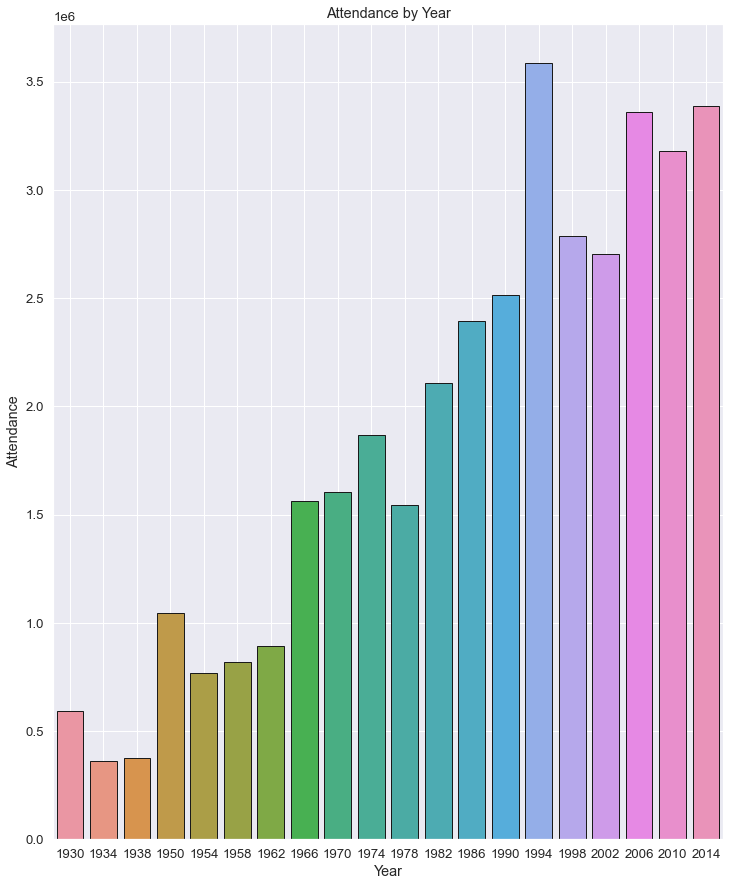

In [266]:
plt.figure(figsize=(12,15))
ax = plt.subplot()
sns.barplot(
data=att,
x=att['Year'],y=att['Attendance'], edgecolor='k')
sns.set_palette('Paired', 5)

plt.grid(True)
plt.title('Attendance by Year')
#ax.set_yticks('Attendance')
plt.show()



#### Matches with Highest Attendance 

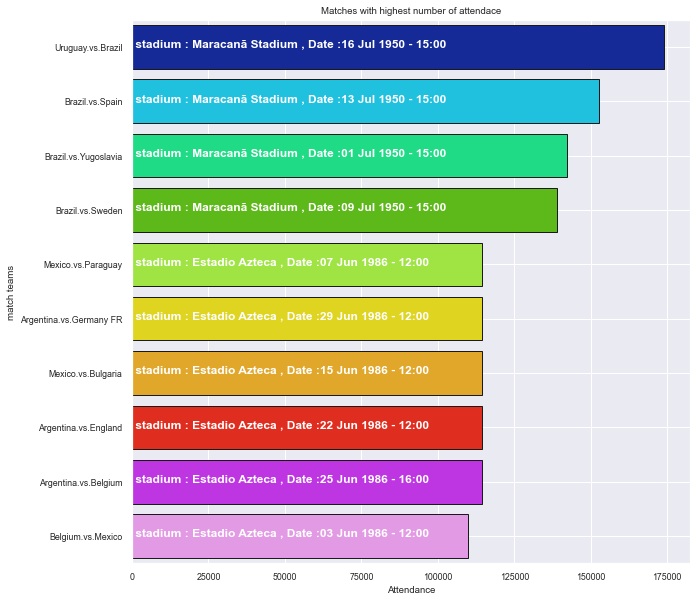

In [310]:
high_att = df.sort_values(by="Attendance",ascending=False)[:10]
high_att = high_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
high_att['Stadium'] = high_att['Stadium'].replace('Maracan� - Est�dio Jornalista M�rio Filho','Maracanã Stadium')
high_att['Text'] = high_att['Home Team Name'] + '.vs.' + high_att['Away Team Name']

sns.set_style('dark')
f, ax5 = plt.subplots(figsize=(10,10)) 
ax5 = sns.barplot(data=high_att, y=high_att['Text'], x=high_att['Attendance'], edgecolor='k', palette="gist_ncar")
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace")
plt.grid(True)
for i,j in enumerate(" stadium : "+high_att["Stadium"]+" , Date :" + high_att["Datetime"]):
    ax5.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

#### Total Goals Scored by Year
Goals scored by year followed a positive relationship as more goals were being scored each year. The space between the year 1938-1950 was as a result of the world cup being put on hold due to the second the World War.

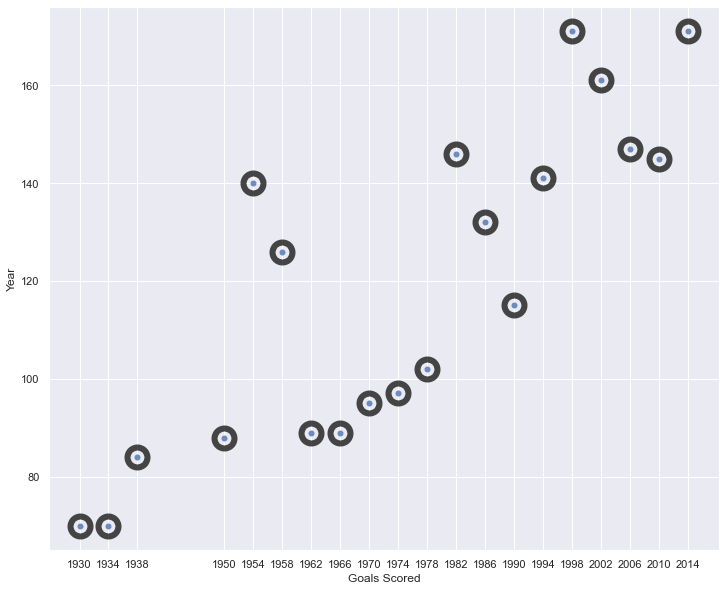

In [212]:
plt.close()
f, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df3['Year'], df3['GoalsScored'], linewidth= 20, edgecolor='k', alpha=.8)
ax.set_xticks(df3['Year'])

plt.xlabel('Goals Scored')
plt.ylabel('Year')
plt.show()

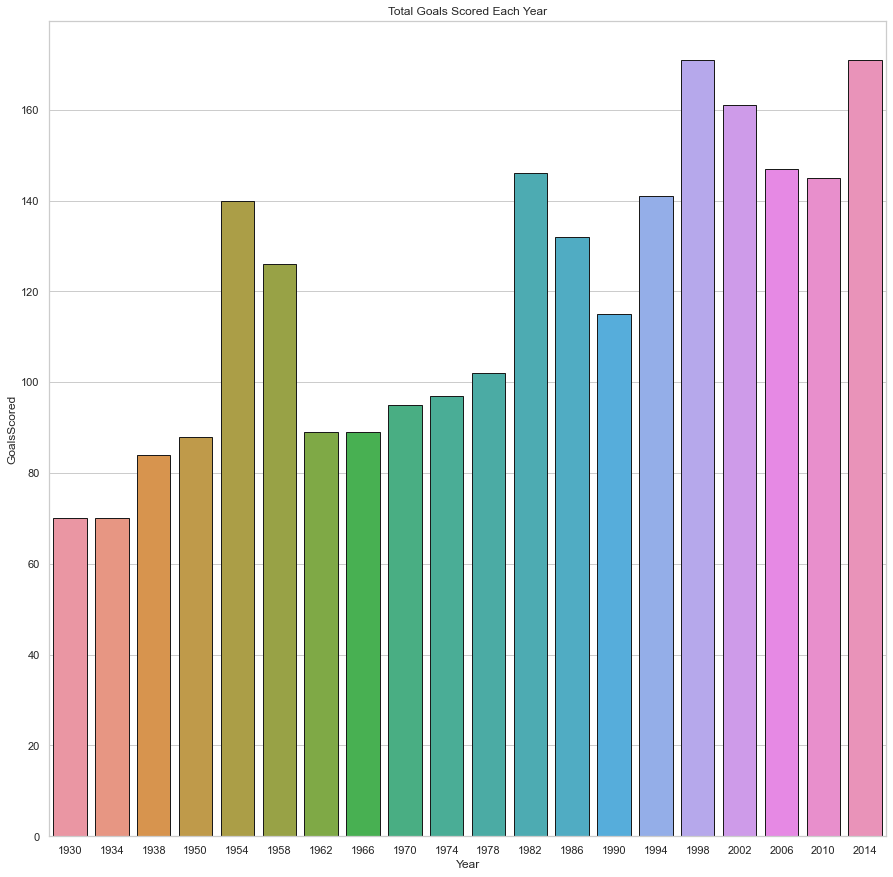

In [275]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.0)
f, ax = plt.subplots(figsize=(15, 15))

ax = sns.barplot(data=df3, 
x='Year',
y='GoalsScored', edgecolor='k')
ax.set_title('Total Goals Scored Each Year')
plt.show()

#### Goals Scored per Match

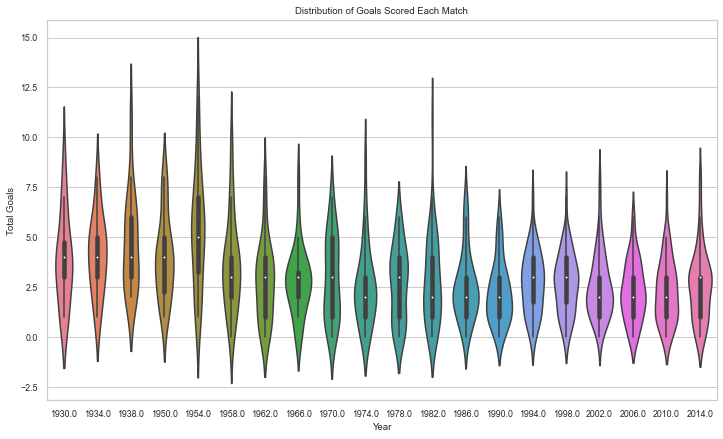

In [330]:
#we want to visualize the total number of goals scored in each match. We start by adding Home and Away goals for wach match.
df['Total Goals'] = df.apply(lambda x: (x['Home Team Goals'] + x['Away Team Goals']), axis=1)
#or
#df['Total Goals'] = df['Home Team Goals'] + df['Away Team Goals']


sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=0.8)
f, ax = plt.subplots(figsize=(12, 7))

ax = sns.violinplot(data=df, 
x='Year',
y='Total Goals', palette="husl")
ax.set_title('Distribution of Goals Scored Each Match')
plt.show()

#### Average Goals Scored By Country

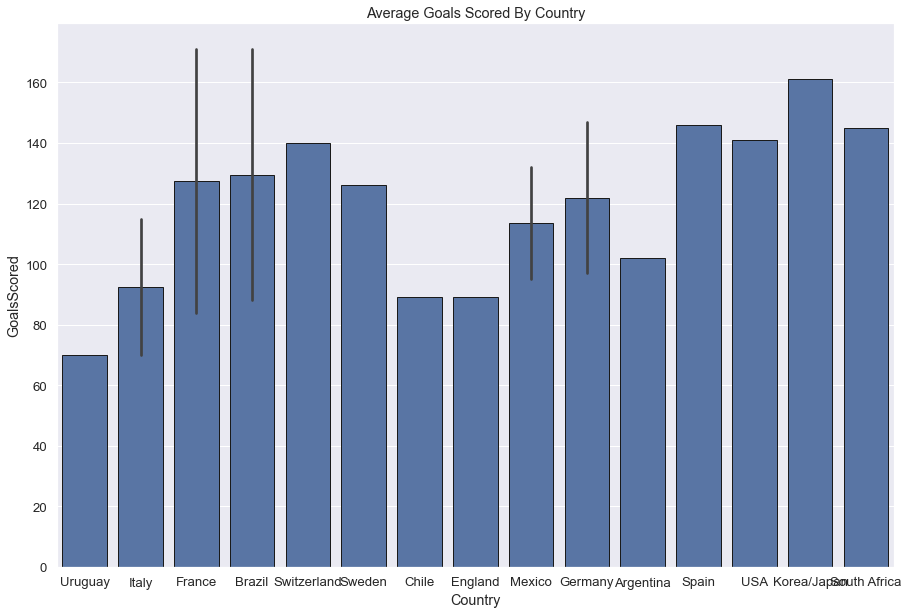

In [272]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.color_palette('Paired', 10)
sns.set_context('notebook',font_scale=1.2)
ax3 = sns.barplot(
data=df3,
x='Country',
y='GoalsScored', edgecolor = 'k', color='b')
ax3.set_title('Average Goals Scored By Country')
plt.show()

#### Total Matches played and Qualified Teams by Year
- In the tournaments between 1934 and 1978, 16 teams competed in each tournament, except in 1938, when Austria was absorbed into Germany after qualifying, leaving the tournament with 15 teams, and in 1950, when India, Scotland, and Turkey withdrew, leaving the tournament with 13 teams.

- The tournament was expanded to 24 teams in 1982, and then to 32 in 1998,also allowing more teams from Africa, Asia and North America to take part.

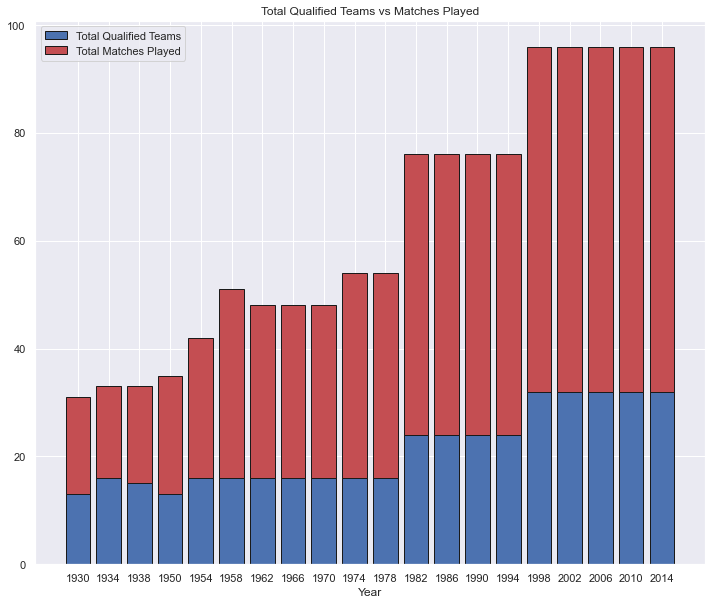

In [229]:
f, ax = plt.subplots(figsize=(12,10))
plt.bar(range(len(df3['Year'])), df3['QualifiedTeams'], color='b', edgecolor='k', linewidth=1, label='Total Qualified Teams')
plt.bar(range(len(df3['Year'])), df3['MatchesPlayed'], color='r', edgecolor='k', linewidth=1, label='Total Matches Played', bottom=df3['QualifiedTeams'])
ax.set_xticks(range(len(df3['Year'])))
ax.set_xticklabels(df3['Year'])
plt.xlabel('Year')
plt.title('Total Qualified Teams vs Matches Played')
plt.legend()
plt.show()

#### Teams With the most victories

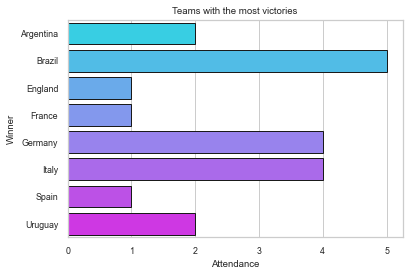

In [345]:
most = df3[['Year', 'Country', 'Winner', 'Attendance']]

most = most.sort_values(by='Year', ascending=False)
most['Winner'] = most['Winner'].replace('Germany FR','Germany', regex=True)

most = most.groupby('Winner').Attendance.count().reset_index()


ax7 = sns.barplot(x=most['Attendance'], y=most['Winner'], data=most, palette='cool', edgecolor='k')
plt.title('Teams with the most victories')

plt.show()